# NLP: pandas basics

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/phonchi/ModularPython/blob/master/NLP-pandas_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/phonchi/ModularPython/blob/master/NLP-pandas_basics.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [ ]:
import numpy as np
import pandas as pd

### Better display format

In [ ]:
import nltk
nltk.download('inaugural')

from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


In [ ]:
# List all files in the inaugural corpus
files = inaugural.fileids()
print("Available files in the inaugural corpus:", files)
len(files)

Available files in the inaugural corpus: ['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Ca

59

In [ ]:
# Select a specific document, for example, the last document
last_doc = files[-1]
print("Last document:", last_doc)

Last document: 2021-Biden.txt


In [ ]:
# Load and print the raw content of the last document
text = inaugural.raw(last_doc)
print("Content of", last_doc, ":\n", text[:500])  # Print the first 500 characters to check the content

Content of 2021-Biden.txt :
 Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, and my distinguished guests, and my fellow Americans: This is America's day. This is democracy's day, a day of history and hope, of renewal and resolve. Through a crucible for the ages America has been tested anew, and America has risen to the challenge.

Today we celebrate the triumph not of a candidate, but of a cause, the cause of democracy. The peopleâthe will of the people


In [ ]:
texts = [inaugural.raw(file) for file in files] # Collect all text

In [ ]:
# ignore the last 4 characters ".txt"
years = [file[:-4].split("-")[0] for file in files]
presidents = [file[:-4].split("-")[1] for file in files]
print(years[-10:]) # print last few files
print(presidents[-10:]) # print last few files

['1985', '1989', '1993', '1997', '2001', '2005', '2009', '2013', '2017', '2021']
['Reagan', 'Bush', 'Clinton', 'Clinton', 'Bush', 'Bush', 'Obama', 'Obama', 'Trump', 'Biden']


In [ ]:
df = pd.DataFrame({
    "year": years,
    "president": presidents,
    "file": files,
    "text": texts
})
df.set_index("year", inplace=True)
df.tail() # print last few files

,president,file,text
year,,,
2005,Bush,2005-Bush.txt,"Vice President Cheney, Mr. Chief Justice, Pres..."
2009,Obama,2009-Obama.txt,My fellow citizens:\n\nI stand here today humb...
2013,Obama,2013-Obama.txt,Thank you. Thank you so much.\n\nVice Presiden...
2017,Trump,2017-Trump.txt,"Chief Justice Roberts, President Carter, Presi..."
2021,Biden,2021-Biden.txt,"Chief Justice Roberts, Vice President Harris, ..."


In [ ]:
df["length"] = df.text.str.split().str.len()
df.tail() # print last few files

,president,file,text,length
year,,,,
2005,Bush,2005-Bush.txt,"Vice President Cheney, Mr. Chief Justice, Pres...",2056
2009,Obama,2009-Obama.txt,My fellow citizens:\n\nI stand here today humb...,2415
2013,Obama,2013-Obama.txt,Thank you. Thank you so much.\n\nVice Presiden...,2090
2017,Trump,2017-Trump.txt,"Chief Justice Roberts, President Carter, Presi...",1456
2021,Biden,2021-Biden.txt,"Chief Justice Roberts, Vice President Harris, ...",2535


In [ ]:
df

,president,file,text,length
year,,,,
1789,Washington,1789-Washington.txt,Fellow-Citizens of the Senate and of the House...,1431
1793,Washington,1793-Washington.txt,"Fellow citizens, I am again called upon by the...",135
1797,Adams,1797-Adams.txt,"When it was first perceived, in early times, t...",2319
1801,Jefferson,1801-Jefferson.txt,Friends and Fellow Citizens:\n\nCalled upon to...,1730
1805,Jefferson,1805-Jefferson.txt,"Proceeding, fellow citizens, to that qualifica...",2167
1809,Madison,1809-Madison.txt,Unwilling to depart from examples of the most ...,1177
1813,Madison,1813-Madison.txt,About to add the solemnity of an oath to the o...,1210
1817,Monroe,1817-Monroe.txt,I should be destitute of feeling if I was not ...,3373
1821,Monroe,1821-Monroe.txt,"Fellow citizens, I shall not attempt to descri...",4470


In [ ]:
df.length.plot(hover_data={'president': df.president}, backend='plotly')

In [ ]:
i = df.length.argmax()
print(df.iloc[i])

president                                             Harrison
file                                         1841-Harrison.txt
text         Called from a retirement which I had supposed ...
length                                                    8428
Name: 1841, dtype: object


### DataFrame

The pandas package can be viewed as a powerful Excel.  It loses the graphic user interface, but its much more flexible and efficient --- which is a fair compromise.  In pandas, it uses `Series` for list data and `DataFrame` for table data.  

A `Series` is a list with index.

In [ ]:
years = list(range(1911, 2030))
y2z = ["rat", "ox", "tiger", "rabbit", "dragon", "snake", "horse", "goat", "monkey", "rooster", "dog", "pig"]
zodiac = [y2z[(y - 1912) % 12] for y in years]
Z = pd.Series(zodiac, index=years)
Z

1911        pig
1912        rat
1913         ox
1914      tiger
1915     rabbit
         ...   
2025      snake
2026      horse
2027       goat
2028     monkey
2029    rooster
Length: 119, dtype: object

A `DataFrame` is

- a dictionary of `Series` (columns), or
- a list of lists (rows).

Recall the example.  

| student \ subject | A | B | C | D | E | decision | comments |
|----|----|----|----|----|----|----|----|
| 1 | 10 | 10 | 10 | 10 | 10 | accept | good |
| 2 | 10 | 10 | 10 | 10 | 0 | accept | so so |
| 3 | 0 | 0 | 15 | 0 | 0 | decline | need improvement |

In [ ]:
cht = [10, 10, 0]
eng = [10, 10, 15]
math = [10, 10, 15]
nsci = [10, 10, 0]
ssci = [10, 0, 0]
df = pd.DataFrame({
    "Chinese": cht,
    "English": eng,
    "Math": math,
    "N. Science": nsci,
    "S. Science": ssci
})
df

,Chinese,English,Math,N. Science,S. Science
0,10,10,10,10,10
1,10,10,10,10,0
2,0,15,15,0,0


In [ ]:
arr = [[10, 10, 10, 10, 10],
    [10, 10, 10, 10, 0],
    [0, 0, 15, 0, 0]]
df = pd.DataFrame(arr)
df

,0,1,2,3,4
0,10,10,10,10,10
1,10,10,10,10,0
2,0,0,15,0,0


### Index and columns

The names of the rows are stored in `df.index` , while the names of the columns are stored in `df.columns' .

In [ ]:
arr = [[10, 10, 10, 10, 10],
       [10, 10, 10, 10, 0],
       [0, 0, 15, 0, 0]]
df = pd.DataFrame(arr)
df.index = ["Amy", "Bill", "Charles"]
df.columns =  ["Chinese", "English", "Math", "N. Science", "S. Science"]
df

,Chinese,English,Math,N. Science,S. Science
Amy,10,10,10,10,10
Bill,10,10,10,10,0
Charles,0,0,15,0,0


Adding a new column is easy.

In [ ]:
df["decision"] = ["accept", "accept", "decline"]
df["comments"] = ["good", "so so", "need improvement"]
df

,Chinese,English,Math,N. Science,S. Science,decision,comments
Amy,10,10,10,10,10,accept,good
Bill,10,10,10,10,0,accept,so so
Charles,0,0,15,0,0,decline,need improvement


### Selection and slicing

In [ ]:
arr = [[10, 10, 10, 10, 10],
    [10, 10, 10, 10, 0],
    [0, 0, 15, 0, 0]]
df = pd.DataFrame(arr)
df.index = ["Amy", "Bill", "Charles"]
df.columns =  ["Chinese", "English", "Math", "N. Science", "S. Science"]
df["decision"] = ["accept", "accept", "decline"]
df["comments"] = ["good", "so so", "need improvement"]
df

,Chinese,English,Math,N. Science,S. Science,decision,comments
Amy,10,10,10,10,10,accept,good
Bill,10,10,10,10,0,accept,so so
Charles,0,0,15,0,0,decline,need improvement


Each row or column has a numerical index and a name.  For the numerical index, use `df.iloc` to select the entry, while for the name, use `df.loc` instead.

In [ ]:
df.loc['Bill']

Chinese           10
English           10
Math              10
N. Science        10
S. Science         0
decision      accept
comments       so so
Name: Bill, dtype: object

In [ ]:
df.iloc[1]

Chinese           10
English           10
Math              10
N. Science        10
S. Science         0
decision      accept
comments       so so
Name: Bill, dtype: object

The idea of slicing in NumPy also works in pandas.  In addition, it allows you to slice by names.

In [ ]:
df.loc[:, "Chinese":"S. Science"]

,Chinese,English,Math,N. Science,S. Science
Amy,10,10,10,10,10
Bill,10,10,10,10,0
Charles,0,0,15,0,0


Instead of `df.iloc[:,i]` , getting a column is easy.

In [ ]:
df["decision"]

Amy         accept
Bill        accept
Charles    decline
Name: decision, dtype: object

In [ ]:
df.decision

Amy         accept
Bill        accept
Charles    decline
Name: decision, dtype: object

### Groupby and apply

In [ ]:
arr = [[10, 10, 10, 10, 10],
    [10, 10, 10, 10, 0],
    [0, 0, 15, 0, 0]]
df = pd.DataFrame(arr)
df.index = ["Amy", "Bill", "Charles"]
df.columns =  ["Chinese", "English", "Math", "N. Science", "S. Science"]
df["decision"] = ["accept", "accept", "decline"]
df["comments"] = ["good", "so so", "need improvement"]
df

,Chinese,English,Math,N. Science,S. Science,decision,comments
Amy,10,10,10,10,10,accept,good
Bill,10,10,10,10,0,accept,so so
Charles,0,0,15,0,0,decline,need improvement


There are several ways to manipulate the data to extract new features.  

In [ ]:
df["total"] = df.loc[:,"Chinese":"S. Science"].sum(axis=1)
df

,Chinese,English,Math,N. Science,S. Science,decision,comments,total
Amy,10,10,10,10,10,accept,good,50
Bill,10,10,10,10,0,accept,so so,40
Charles,0,0,15,0,0,decline,need improvement,15


In [ ]:
df["w. total"] = df["Chinese"] + 2*df["English"] + 2*df["Math"] + 2*df["N. Science"]
df

,Chinese,English,Math,N. Science,S. Science,decision,comments,total,w. total
Amy,10,10,10,10,10,accept,good,50,70
Bill,10,10,10,10,0,accept,so so,40,70
Charles,0,0,15,0,0,decline,need improvement,15,30


If there are no appropriate built-in function for your purpose or the function is too complicated, you may use `apply` to apply a function to the data.

In [ ]:
df["pre-decision"] = df["w. total"].apply(lambda k: "accept" if k >= 60 else "decline")
df

,Chinese,English,Math,N. Science,S. Science,decision,comments,total,w. total,pre-decision
Amy,10,10,10,10,10,accept,good,50,70,accept
Bill,10,10,10,10,0,accept,so so,40,70,accept
Charles,0,0,15,0,0,decline,need improvement,15,30,decline


Lastly, you may group the data by the values of some column and get collective information.  

    groupby = split + apply + combine

In [ ]:
df.loc[:,"Chinese":"decision"].groupby("decision").mean()

,Chinese,English,Math,N. Science,S. Science
decision,,,,,
accept,10.0,10.0,10.0,10.0,5.0
decline,0.0,0.0,15.0,0.0,0.0


### 📘 NLP task: find themes in each centrury

Let's try to find the most frequent words in the inaugural addresses in each period of times.

In [ ]:
import nltk
nltk.download('inaugural')

from nltk.corpus import inaugural

files = inaugural.fileids()
texts = [inaugural.raw(file) for file in files]
years = [file[:-4].split("-")[0] for file in files]
presidents = [file[:-4].split("-")[1] for file in files]
df = pd.DataFrame({
    "year": years,
    "president": presidents,
    "file": files,
    "text": texts
})
df.set_index("year", inplace=True)
df.tail() # print last few files

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


,president,file,text
year,,,
2005,Bush,2005-Bush.txt,"Vice President Cheney, Mr. Chief Justice, Pres..."
2009,Obama,2009-Obama.txt,My fellow citizens:\n\nI stand here today humb...
2013,Obama,2013-Obama.txt,Thank you. Thank you so much.\n\nVice Presiden...
2017,Trump,2017-Trump.txt,"Chief Justice Roberts, President Carter, Presi..."
2021,Biden,2021-Biden.txt,"Chief Justice Roberts, Vice President Harris, ..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorize the text data and convert to DataFrame
cvec = CountVectorizer(stop_words='english')
X = cvec.fit_transform(df.text)
X_df = pd.DataFrame(X.toarray(), columns=cvec.get_feature_names_out(), index=df.index)
X_df

,000,100,108,11,120,125,13,14th,15th,16,...,young,younger,youngest,youth,youthful,youâ,zeal,zealous,zealously,zone
year,,,,,,,,,,,,,,,,,,,,,
1789,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
1809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
1821,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
# Find the top 5 keywords for each document
df['keywords'] = X_df.apply(lambda row: row.nlargest(5).index.tolist(), axis=1)
df.tail() # print last few files

,president,file,text,keywords
year,,,,
2005,Bush,2005-Bush.txt,"Vice President Cheney, Mr. Chief Justice, Pres...","[freedom, america, liberty, nation, americans]"
2009,Obama,2009-Obama.txt,My fellow citizens:\n\nI stand here today humb...,"[nation, new, america, let, people]"
2013,Obama,2013-Obama.txt,Thank you. Thank you so much.\n\nVice Presiden...,"[people, time, america, country, make]"
2017,Trump,2017-Trump.txt,"Chief Justice Roberts, President Carter, Presi...","[america, american, people, country, nation]"
2021,Biden,2021-Biden.txt,"Chief Justice Roberts, Vice President Harris, ...","[america, nation, democracy, americans, people]"


In [ ]:
# Group years by decade
df["decade"] = df.index.astype(int) // 10 * 10
df.tail() # print last few files

,president,file,text,keywords,decade
year,,,,,
2005,Bush,2005-Bush.txt,"Vice President Cheney, Mr. Chief Justice, Pres...","[freedom, america, liberty, nation, americans]",2000
2009,Obama,2009-Obama.txt,My fellow citizens:\n\nI stand here today humb...,"[nation, new, america, let, people]",2000
2013,Obama,2013-Obama.txt,Thank you. Thank you so much.\n\nVice Presiden...,"[people, time, america, country, make]",2010
2017,Trump,2017-Trump.txt,"Chief Justice Roberts, President Carter, Presi...","[america, american, people, country, nation]",2010
2021,Biden,2021-Biden.txt,"Chief Justice Roberts, Vice President Harris, ...","[america, nation, democracy, americans, people]",2020


In [ ]:
df.loc[:, "keywords":"decade"].groupby("decade").sum()

,keywords
decade,
1780,"[government, public, citizens, country, present]"
1790,"[shall, oath, act, administration, america, pe..."
1800,"[government, citizens, fellow, let, man, publi..."
1810,"[war, british, country, united, citizens, gove..."
1820,"[great, states, united, war, citizens, union, ..."
1830,"[government, people, union, states, general, p..."
1840,"[power, people, constitution, government, citi..."
1850,"[power, government, shall, great, nation, stat..."
1860,"[constitution, people, union, states, governme..."


### 🔍 Supplementary: Word Cloud

In [ ]:
import string, re
def clean_text(text):
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    return text

df['text'] = df['text'].apply(clean_text)

In [ ]:
df

,president,file,text,length
year,,,,
1789,Washington,1789-Washington.txt,fellowcitizens of the senate and of the house ...,1431
1793,Washington,1793-Washington.txt,fellow citizens i am again called upon by the ...,135
1797,Adams,1797-Adams.txt,when it was first perceived in early times tha...,2319
1801,Jefferson,1801-Jefferson.txt,friends and fellow citizenscalled upon to unde...,1730
1805,Jefferson,1805-Jefferson.txt,proceeding fellow citizens to that qualificati...,2167
1809,Madison,1809-Madison.txt,unwilling to depart from examples of the most ...,1177
1813,Madison,1813-Madison.txt,about to add the solemnity of an oath to the o...,1210
1817,Monroe,1817-Monroe.txt,i should be destitute of feeling if i was not ...,3373
1821,Monroe,1821-Monroe.txt,fellow citizens i shall not attempt to describ...,4470


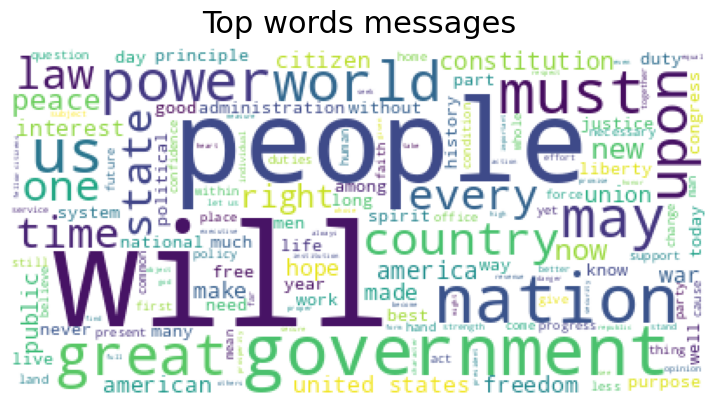

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(
    background_color='white',
    max_words=200
)
wc.generate(' '.join(text for text in df['text']))
plt.figure(figsize=(9,5))
plt.title('Top words messages',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

### 📚 Further reading

- [_Python Data Science Handbook_](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas